Lowercase

In [1]:
import pandas as pd

# Define the path to your CSV file
csv_file = 'Bard AI.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Convert all text columns to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

Removing numbers

In [2]:
# Function to remove numbers from a string
def remove_numbers(text):
    return ''.join([char for char in text if not char.isdigit()])

# Apply the remove_numbers function to columns containing strings
df = df.applymap(lambda x: remove_numbers(str(x)) if isinstance(x, str) else x)

C:\Users\Purgatory\AppData\Local\Temp\ipykernel_6588\262874815.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: remove_numbers(str(x)) if isinstance(x, str) else x)


Removing punctuations

In [3]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer

# Function to remove punctuation using RegexpTokenizer
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

# Apply the remove_punctuation function to columns containing strings
df = df.applymap(lambda x: remove_punctuation(str(x)) if isinstance(x, str) else x)

C:\Users\Purgatory\AppData\Local\Temp\ipykernel_6588\1511567814.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: remove_punctuation(str(x)) if isinstance(x, str) else x)


Removing stopwords

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords


# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to columns containing strings
df = df.applymap(lambda x: remove_stopwords(str(x)) if isinstance(x, str) else x)

C:\Users\Purgatory\AppData\Local\Temp\ipykernel_6588\1633075789.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: remove_stopwords(str(x)) if isinstance(x, str) else x)


Lemmatization

In [5]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Lemmatize each word based on its part of speech
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    # Join the lemmatized words back into a sentence
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Helper function to get WordNet part of speech tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if no match is found

# Apply the lemmatize_text function to columns containing strings
df = df.applymap(lambda x: lemmatize_text(str(x)) if isinstance(x, str) else x)

C:\Users\Purgatory\AppData\Local\Temp\ipykernel_6588\999503772.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: lemmatize_text(str(x)) if isinstance(x, str) else x)


In [6]:
# Save the modified DataFrame to a new CSV file
df.to_csv('BardAI_cleaned.csv', index=False)

print("Lemmatization has been applied to the dataset and saved as ChatGPT_cleaned.csv.")

Lemmatization has been applied to the dataset and saved as ChatGPT_cleaned.csv.


In [7]:
df.head()

,Title,Content
0,morning pixel pro bard ai everything else goog...,although announcement leak advance pixel news ...
1,bing bard update fuel ai search war computerworld,jon gold senior writer computerworld microsoft...
2,google launch generative ai enhance version as...,emma roth news writer cover stream war consume...
3,chatgpt vision overtakes google bard future ai...,artificial intelligence make stride across ind...
4,briefing google overhaul mobile voice assistan...,anthropic talk raise billion google others day...


In [8]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
import pandas as pd

dt=pd.read_csv('BardAI_cleaned.csv')

In [10]:
import pandas as pd
import re

# Define the path to your CSV file
csv_file = 'BardAI_cleaned.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Convert to list and ensure all elements are treated as strings
data = dt['Content'].astype(str).tolist()

# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]

# Remove numbers
data = [re.sub(r'\d+', ' ', sent) for sent in data]

# Join the cleaned text back into the DataFrame
df['Content'] = data


In [11]:
dt.head()

,Title,Content
0,morning pixel pro bard ai everything else goog...,although announcement leak advance pixel news ...
1,bing bard update fuel ai search war computerworld,jon gold senior writer computerworld microsoft...
2,google launch generative ai enhance version as...,emma roth news writer cover stream war consume...
3,chatgpt vision overtakes google bard future ai...,artificial intelligence make stride across ind...
4,briefing google overhaul mobile voice assistan...,anthropic talk raise billion google others day...


In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['although', 'announcement', 'leak', 'advance', 'pixel', 'news', 'google', 'one', 'sort', 'surprise', 'work', 'fuse', 'assistant', 'bard', 'ai', 'together', 'demo', 'google', 'show', 'assistant', 'pull', 'detail', 'party', 'invite', 'gmail', 'ask', 'party', 'assistant', 'bard', 'tell', 'location', 'tap', 'google', 'map', 'direction', 'able', 'ask', 'direction', 'past', 'assistant', 'pull', 'address', 'context', 'could', 'chat', 'bard', 'whip', 'meal', 'plan', 'grocery', 'list', 'export', 'google', 'doc', 'gmail', 'without', 'keyboard', 'copy', 'paste', 'release', 'date', 'yet', 'google', 'say', 'assistant', 'bard', 'come', 'soon', 'android', 'io', 'quick', 'note', 'anyone', 'try', 'subscribe', 'get', 'tma', 'newsletter', 'upgraded', 'signup', 'process', 'please', 'click', 'subscribe', 'mat', 'smith', 'google', 'pixel', 'watch', 'hand', 'apple', 'fix', 'iphone', 'overheat', 'issue', 'google', 'pixel', 'small', 'inch', 'flagship', 'big', 'battery', 'pixel', 'series', 'get', 'ai', 'power

In [13]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['although', 'announcement', 'leak', 'advance', 'pixel', 'news', 'google', 'one', 'sort', 'surprise', 'work', 'fuse', 'assistant', 'bard', 'ai', 'together', 'demo', 'google', 'show', 'assistant', 'pull', 'detail', 'party', 'invite', 'gmail', 'ask', 'party', 'assistant', 'bard', 'tell', 'location', 'tap', 'google', 'map', 'direction', 'able', 'ask', 'direction', 'past', 'assistant', 'pull', 'address', 'context', 'could', 'chat', 'bard', 'whip', 'meal', 'plan', 'grocery_list', 'export', 'google', 'doc', 'gmail', 'without', 'keyboard', 'copy', 'paste', 'release', 'date', 'yet', 'google', 'say', 'assistant', 'bard', 'come', 'soon', 'android_io', 'quick', 'note', 'anyone', 'try', 'subscribe', 'get', 'tma', 'newsletter', 'upgraded', 'signup', 'process', 'please', 'click', 'subscribe', 'mat', 'smith', 'google', 'pixel', 'watch', 'hand', 'apple', 'fix', 'iphone', 'overheat', 'issue', 'google', 'pixel', 'small', 'inch', 'flagship', 'big', 'battery', 'pixel', 'series', 'get', 'ai', 'power', 'edi

In [14]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','ai','bard', 'subject', 're', 'edu', 'use','U.S.','also','research','time','much','scientist','researcher','say','year','well','due','per_cent','percent','author','per _cent'])

In [16]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])
#df=pd.DataFrame(data_lemmatized)
#df.to_csv('processed_data.csv')

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 4), (1, 3), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 4), (14, 1), (15, 3), (16, 1), (17, 5), (18, 1), (19, 1), (20, 4), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 3), (48, 2), (49, 1), (50, 1), (51, 4), (52, 1), (53, 4), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 3), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 3), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 3), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 2), (99, 1), (100, 1), (101, 1), (102, 3), (103, 1), (104, 2), (105, 2), (106, 2), (107, 2), (108, 1), (109, 1), (110, 1)

In [18]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 4),
  ('access', 3),
  ('addition', 1),
  ('address', 2),
  ('adopt', 1),
  ('agree', 1),
  ('airbnb', 2),
  ('airtag', 1),
  ('allow', 1),
  ('already', 1),
  ('amazon', 2),
  ('android', 2),
  ('android_io', 1),
  ('announce', 4),
  ('announcement', 1),
  ('app', 3),
  ('apparently', 1),
  ('apple', 5),
  ('approval', 1),
  ('ask', 1),
  ('assistant', 4),
  ('audio', 2),
  ('available', 1),
  ('backward', 1),
  ('battery', 1),
  ('believe', 1),
  ('big', 1),
  ('bit', 1),
  ('body', 1),
  ('book', 2),
  ('build', 1),
  ('business', 1),
  ('camera', 1),
  ('capability', 1),
  ('case', 1),
  ('catch', 1),
  ('cause', 1),
  ('change', 2),
  ('chat', 1),
  ('chesky', 2),
  ('chief', 1),
  ('choose', 1),
  ('click', 1),
  ('close', 1),
  ('closely', 1),
  ('come', 2),
  ('commerce', 1),
  ('company', 3),
  ('compare', 2),
  ('compatibility', 1),
  ('competitor', 1),
  ('content', 4),
  ('context', 1),
  ('continue_reade', 4),
  ('core', 1),
  ('cost', 1),
  ('couple', 1),
  ('c

In [19]:
Lda=  gensim.models.ldamodel.LdaModel
lda_model=Lda(corpus, num_topics=4, id2word=id2word, passes=1, random_state=0, eval_every=None)

In [20]:
# Print the Keyword in the 'n' topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"good" + 0.008*"user" + 0.008*"new" + 0.007*"make" + '
  '0.007*"assistant" + 0.005*"response" + 0.005*"company" + 0.005*"get" + '
  '0.005*"product" + 0.005*"chatgpt"'),
 (1,
  '0.007*"chatbot" + 0.007*"assistant" + 0.007*"company" + 0.006*"ask" + '
  '0.006*"information" + 0.006*"chatgpt" + 0.006*"new" + 0.006*"make" + '
  '0.006*"user" + 0.005*"response"'),
 (2,
  '0.007*"make" + 0.007*"ask" + 0.006*"company" + 0.006*"user" + 0.006*"new" + '
  '0.005*"chatgpt" + 0.005*"chatbot" + 0.005*"product" + 0.005*"response" + '
  '0.005*"good"'),
 (3,
  '0.007*"good" + 0.007*"company" + 0.006*"user" + 0.006*"get" + 0.006*"ask" + '
  '0.006*"help" + 0.005*"chatgpt" + 0.005*"new" + 0.005*"make" + '
  '0.005*"image"')]


In [21]:
count=0
for i in lda_model[corpus]:
    print("doc: ", count, i)
    count=count+1

doc:  0 [(0, 0.99832183)]
doc:  1 [(1, 0.15727864), (2, 0.840779)]
doc:  2 [(1, 0.99256665)]
doc:  3 [(1, 0.018555766), (2, 0.29918647), (3, 0.680771)]
doc:  4 [(1, 0.9791035)]
doc:  5 [(0, 0.034588926), (1, 0.6338281), (2, 0.2761967), (3, 0.05538633)]
doc:  6 [(0, 0.98673004), (2, 0.011596099)]
doc:  7 [(1, 0.9948956)]
doc:  8 [(0, 0.34153563), (1, 0.65520424)]
doc:  9 [(1, 0.033988327), (2, 0.67613083), (3, 0.28906035)]
doc:  10 [(1, 0.99073035)]
doc:  11 [(0, 0.04101396), (3, 0.9568616)]
doc:  12 [(1, 0.36200938), (3, 0.6326822)]
doc:  13 [(1, 0.9982525)]
doc:  14 [(1, 0.45733908), (2, 0.5146783), (3, 0.026769157)]
doc:  15 [(0, 0.1267263), (1, 0.38799357), (2, 0.3856258), (3, 0.099654324)]
doc:  16 [(1, 0.9961923)]
doc:  17 [(2, 0.99568176)]
doc:  18 [(1, 0.9957909)]
doc:  19 [(0, 0.9975295)]
doc:  20 [(2, 0.9961562)]
doc:  21 [(1, 0.15380298), (2, 0.8434019)]
doc:  22 [(1, 0.32966775), (2, 0.15597004), (3, 0.5133228)]
doc:  23 [(3, 0.99677575)]
doc:  24 [(0, 0.031094804), (1, 0.65

In [22]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.797172262485107

Coherence Score:  0.32770226660401525


In [23]:
# Visualize the topics
%matplotlib inline
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis
#p = pyLDAvis.gensim.prepare(topic_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'chatgpt_tm.html')
#The larger the bubble, the more frequent is the topic in the documents

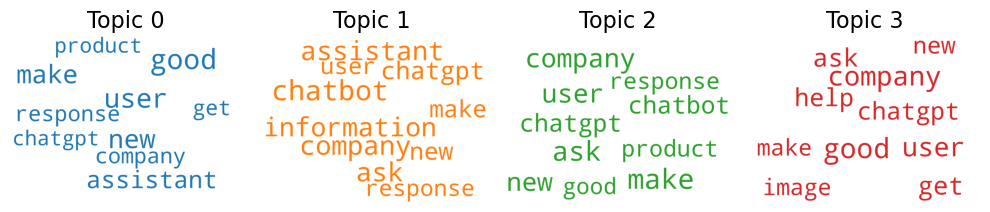

In [24]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 4, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [25]:
# Code to find the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, start=2,limit=10, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=1)

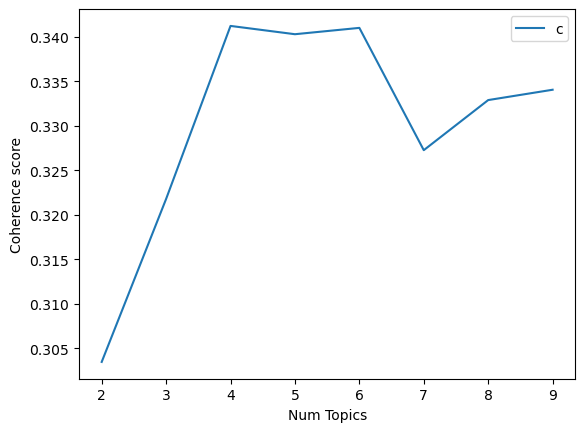

In [27]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [28]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 2  has Coherence Value of 0.303
Num Topics = 3  has Coherence Value of 0.322
Num Topics = 4  has Coherence Value of 0.341
Num Topics = 5  has Coherence Value of 0.34
Num Topics = 6  has Coherence Value of 0.341
Num Topics = 7  has Coherence Value of 0.327
Num Topics = 8  has Coherence Value of 0.333
Num Topics = 9  has Coherence Value of 0.334
